In this notebook -

1. Data was imported into into a pandas dataframe
2. Alphabets were added to the dataframe 
3. Class imbalance was checked
4. Data was scaled
5. Data was fit onto multiclass Logistic Regression 
6. Predicted and actual pictures were compared
7. Feature importance on pixels 

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc


## Pictures of signs 

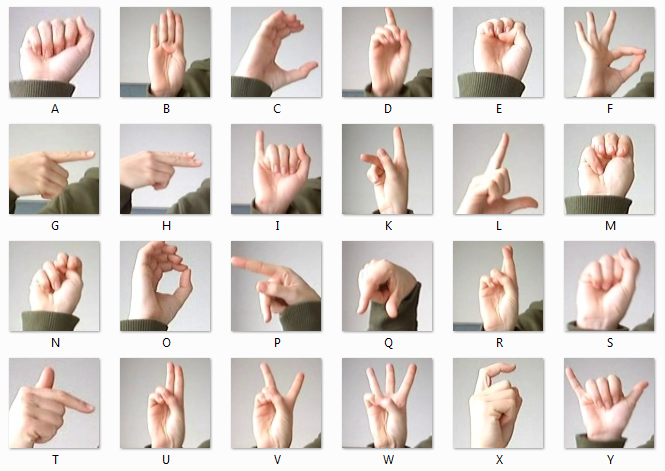

In [2]:
from IPython.display import Image
Image(filename="/Users/prasunamannava/Desktop/Metis/Neural_Networks/DeepLearning_Project/amer_sign2.png", width= 500, height=300)

## Load the dataset

In [3]:
df_sign = pd.read_csv('sign_mnist_train.csv')

In [4]:
df_sign.shape

(27455, 785)

In [5]:
df_sign.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


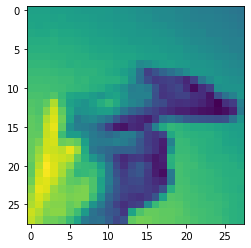

In [6]:
plt.imshow(np.array(df_sign.iloc[68, 1:]).reshape(28,28));

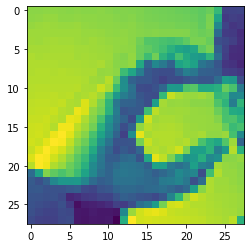

In [7]:
plt.imshow(np.array(df_sign.iloc[3, 1:]).reshape(28,28));

## Adding Alphabets

In [8]:
alphabets = 'abcdefghijklmnopqrstuvwxyz'
index = 0

alpha_num = {}
for alphabet in alphabets:
    alpha_num.update({index: alphabet})
    index += 1

In [9]:
alpha_num

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

In [10]:
df_sign_alpha = df_sign.copy()

In [11]:
df_sign_alpha['Alphabet'] = df_sign_alpha['label'].map(alpha_num)

In [12]:
df_sign_alpha = df_sign_alpha.groupby('Alphabet').first().reset_index()

In [13]:
df_sign_alpha.head()

,Alphabet,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,a,0,197,195,196,195,197,196,195,196,...,84,65,182,213,211,212,212,213,213,213
1,b,1,146,149,150,150,151,152,152,153,...,196,197,197,196,196,195,194,194,190,187
2,c,2,187,188,188,187,187,186,187,188,...,202,201,200,199,198,199,198,195,194,195
3,d,3,107,118,127,134,139,143,146,150,...,207,207,207,207,206,206,206,204,203,202
4,e,4,221,221,222,222,222,224,223,220,...,6,8,0,193,249,234,236,233,233,232


In [14]:
df_alpha = df_sign_alpha.copy()

In [15]:
df_alpha = df_alpha['Alphabet']

In [16]:
df_sign_alpha = df_sign_alpha.drop(columns = 'Alphabet')

In [17]:
%store df_sign_alpha

Stored 'df_sign_alpha' (DataFrame)


## Pictures of Alphabets with numbers 

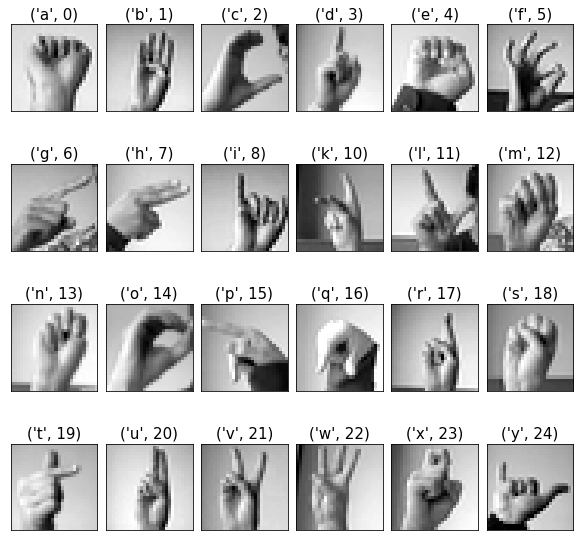

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = np.array(df_sign_alpha.iloc[i, 1:785]).reshape(28,28)
    ax.imshow(img, cmap = 'gray')
    title = df_alpha.iloc[i],df_sign_alpha.label.iloc[i]
    ax.set_title(title, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()



## Count of Classes

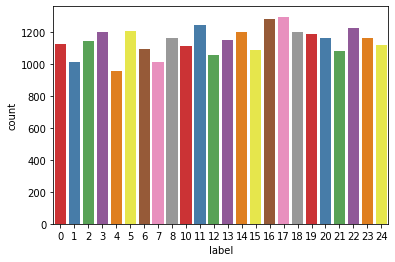

In [19]:
ax = sns.countplot(x="label", data=df_sign, palette = "Set1")

## Train Test Split

In [20]:
X_train = df_sign.iloc[:,1:785]

In [21]:
y_train = df_sign['label']

In [22]:
df_sign_test = pd.read_csv('sign_mnist_test.csv')

In [23]:
df_sign_test.shape

(7172, 785)

In [24]:
df_sign_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [25]:
X_test = df_sign_test.iloc[:,1:785]

In [26]:
y_test = df_sign_test['label']

## Scaling Data

In [27]:
scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Multiclass Logistic Regression

In [29]:
lr = LogisticRegression(multi_class='multinomial',penalty='none', 
                         tol=0.1, solver='saga',)

In [30]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial', penalty='none', solver='saga',
                   tol=0.1)

In [31]:
y_train_pred = lr.predict(X_train_scaled)

In [32]:
y_test_pred = lr.predict(X_test_scaled)

In [33]:
accuracy = metrics.accuracy_score(y_train, y_train_pred)
precision = metrics.precision_score(y_train, y_train_pred, average = 'macro')
recall = metrics.recall_score(y_train, y_train_pred, average = 'macro')
f1 = metrics.f1_score(y_train, y_train_pred, average = 'macro')

In [34]:
print("Train Set Accuracy:" , round(accuracy, 3))
print("Train Set Precision:", round(precision, 3))
print("Train Set Recall:", round(recall, 3))
print("Train Set F1 Score:", round(f1, 3))

Train Set Accuracy: 0.989
Train Set Precision: 0.989
Train Set Recall: 0.989
Train Set F1 Score: 0.989


In [35]:
accuracy = metrics.accuracy_score(y_test, y_test_pred)
precision = metrics.precision_score(y_test, y_test_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_test_pred, average = 'macro')
f1 = metrics.f1_score(y_test, y_test_pred, average = 'macro')

In [36]:
print("Test Set Accuracy:" , round(accuracy, 3))
print("Test Set Precision:", round(precision, 3))
print("Test Set Recall:", round(recall, 3))
print("Test Set F1 Score:", round(f1, 3))

Test Set Accuracy: 0.708
Test Set Precision: 0.706
Test Set Recall: 0.695
Test Set F1 Score: 0.687


## Confusion Matrix

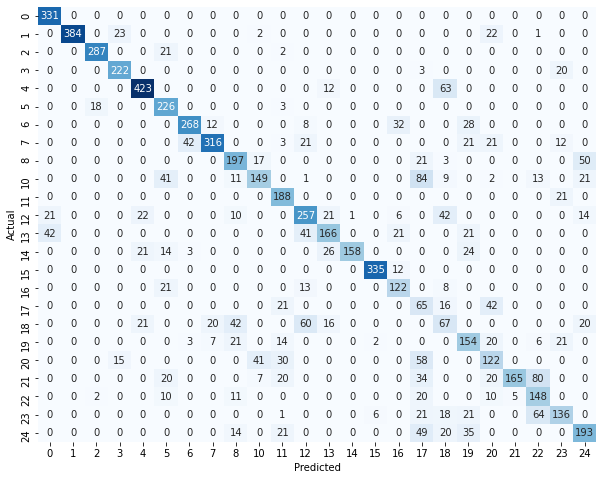

In [37]:
cm = pd.crosstab(y_test, y_test_pred, 
                               rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(10,8));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Blues")

## Evaluating Predicted Images

In [38]:
df_sign_test['Predicted'] = y_test_pred.tolist()

In [39]:
df_sign_test.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Predicted
0,6,149,149,150,150,150,151,151,150,151,...,148,127,89,82,96,106,112,120,107,6
1,5,126,128,131,132,133,134,135,135,136,...,104,194,183,186,184,184,184,182,180,5


In [40]:
df_sign_incorrect = df_sign_test[(df_sign_test['label']!= df_sign_test['Predicted'])]

In [41]:
df_sign_incorrect.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Predicted
12,21,128,131,133,135,137,139,140,142,145,...,130,73,45,61,76,84,85,65,66,10
22,21,130,133,137,141,143,145,147,149,150,...,188,180,182,180,179,178,175,176,174,11


In [42]:
df_sign_incorrect.shape

(2093, 786)

## Picking first row for each subclass

In [43]:
df_sign_incorrect_unique = df_sign_incorrect.groupby('label').first().reset_index()

In [44]:
df_sign_incorrect_unique.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Predicted
0,1,92,95,82,69,65,61,60,34,54,...,98,147,166,168,171,173,175,176,176,20
1,2,115,128,135,136,141,145,150,155,159,...,250,250,253,232,160,94,52,42,43,5
2,3,153,154,154,154,155,154,154,156,154,...,174,185,182,181,180,178,176,173,171,23
3,4,119,123,128,131,134,136,139,140,142,...,67,69,68,65,65,68,54,139,204,18
4,5,129,130,132,134,138,138,138,138,139,...,186,185,183,180,176,175,172,168,168,2


In [45]:
df_sign_incorrect_unique_1 = df_sign_incorrect_unique.rename(columns={"label": "Actual", "Predicted": "label"})

In [46]:
df_sign_incorrect_unique_1.head()

,Actual,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,1,92,95,82,69,65,61,60,34,54,...,98,147,166,168,171,173,175,176,176,20
1,2,115,128,135,136,141,145,150,155,159,...,250,250,253,232,160,94,52,42,43,5
2,3,153,154,154,154,155,154,154,156,154,...,174,185,182,181,180,178,176,173,171,23
3,4,119,123,128,131,134,136,139,140,142,...,67,69,68,65,65,68,54,139,204,18
4,5,129,130,132,134,138,138,138,138,139,...,186,185,183,180,176,175,172,168,168,2


## Adding pixel data for predicted label

In [47]:
df_sign_incorrect_unique_2 = pd.merge(df_sign_incorrect_unique_1, df_sign_alpha, on="label")

In [48]:
df_sign_incorrect_unique_2.head()

,Actual,pixel1_x,pixel2_x,pixel3_x,pixel4_x,pixel5_x,pixel6_x,pixel7_x,pixel8_x,pixel9_x,...,pixel775_y,pixel776_y,pixel777_y,pixel778_y,pixel779_y,pixel780_y,pixel781_y,pixel782_y,pixel783_y,pixel784_y
0,1,92,95,82,69,65,61,60,34,54,...,49,151,154,151,150,149,147,145,144,143
1,2,115,128,135,136,141,145,150,155,159,...,108,106,112,182,210,187,175,162,144,135
2,16,107,109,114,120,133,145,153,161,168,...,108,106,112,182,210,187,175,162,144,135
3,3,153,154,154,154,155,154,154,156,154,...,218,220,221,223,226,228,229,230,230,230
4,11,139,142,144,145,146,147,148,149,150,...,218,220,221,223,226,228,229,230,230,230


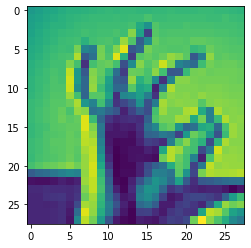

In [49]:
## Predicted image
plt.imshow(np.array(df_sign_incorrect_unique_2.iloc[1, 786:1570]).reshape(28,28));

fig, axes = plt.subplots(3, 2, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    actual = np.array(df_sign_incorrect_unique_2.iloc[i, 1:785]).reshape(28,28);
    predicted = np.array(df_sign_incorrect_unique_2.iloc[i, 786:1570]).reshape(28,28);
    title1 = df_sign_incorrect_unique_2.Actual.iloc[i]
    title2 = df_sign_incorrect_unique_2.label.iloc[i]
    ax.imshow(actual, cmap = 'gray')
    ax.set_title(title1, fontsize = 15)
    ax.imshow(predicted, cmap = 'gray')
    ax.set_title(title2, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()


## Predicted Vs Actual Images

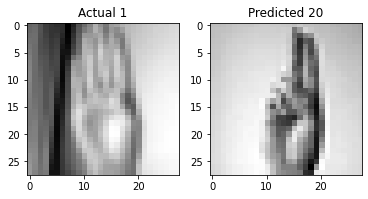

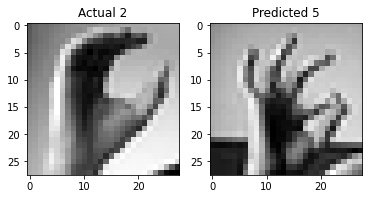

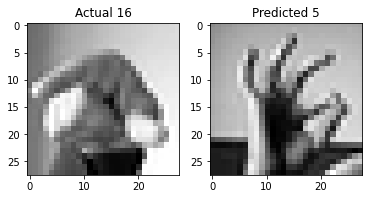

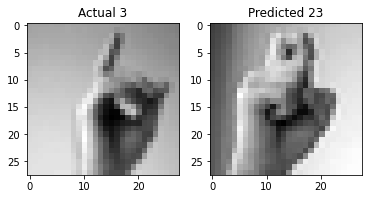

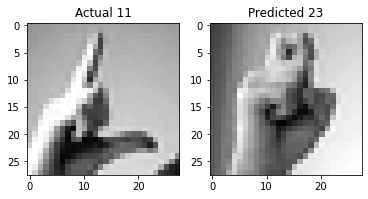

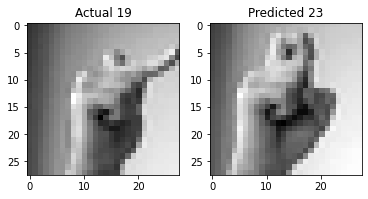

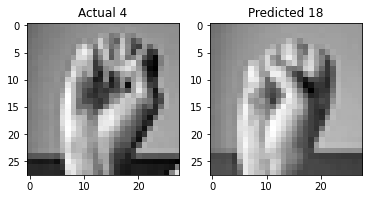

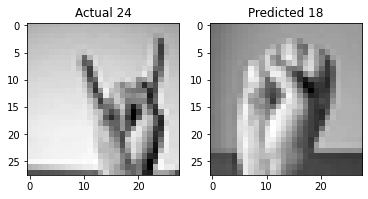

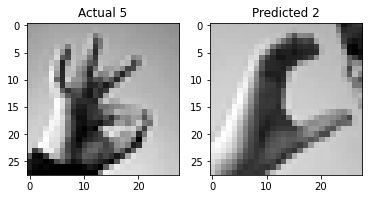

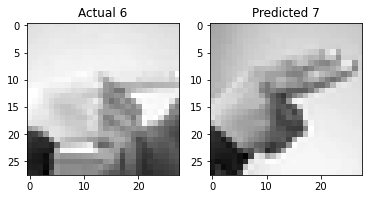

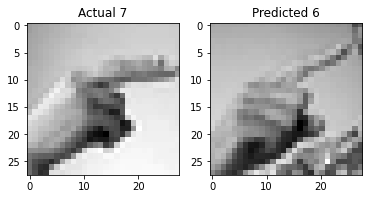

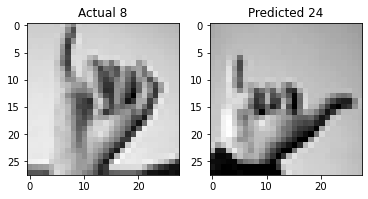

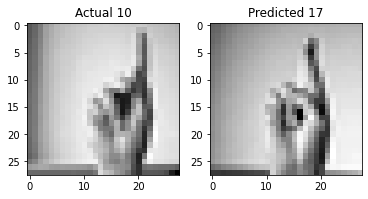

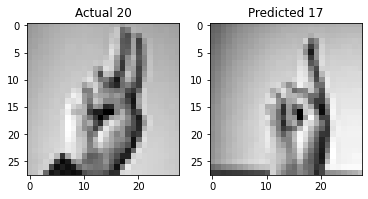

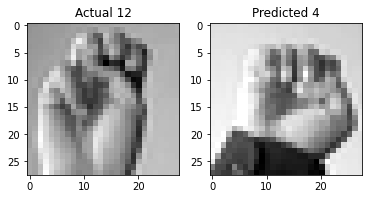

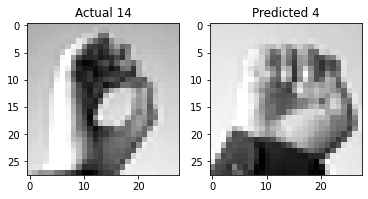

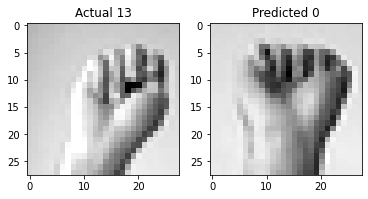

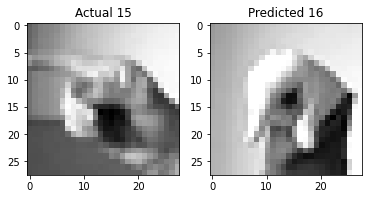

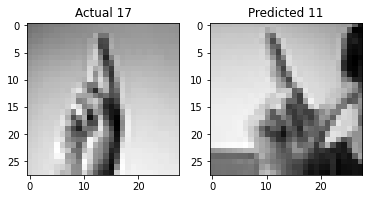

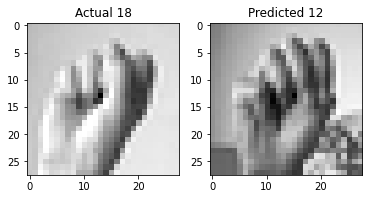

In [50]:
for i in range(20):
    image_actual = np.array(df_sign_incorrect_unique_2.iloc[i, 1:785]).reshape(28,28);
    image_predicted = np.array(df_sign_incorrect_unique_2.iloc[i, 786:1570]).reshape(28,28);


    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.imshow(image_actual, cmap = 'gray')
    plt.title(f"Actual {df_sign_incorrect_unique_2.Actual.iloc[i]}")


    plt.subplot(1, 2, 2) # index 2
    plt.imshow(image_predicted, cmap = 'gray')
    plt.title(f"Predicted {df_sign_incorrect_unique_2.label.iloc[i]}")


    plt.show()

In [51]:
## Initial code

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = np.array(df_sign_incorrect.iloc[i, 1:785]).reshape(28,28)
    #img = np.array(df_sign_incorrect.iloc[i, 1:785]).reshape(28,28)
    ax.imshow(img, cmap = 'gray')
    title = df_sign_incorrect.label.iloc[i],df_sign_incorrect.Predicted.iloc[i]
    ax.set_title(title, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

## Most Misclassified Classes 85 pictures of 10 were classified as 17

In [52]:
mask_10 = df_sign[(df_sign['label'] == 10)]

In [53]:
mask_17 = df_sign[(df_sign['label'] == 17)]

## Comparing 10(k) and 17(r)

## K

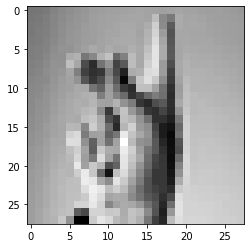

In [54]:
plt.imshow(np.array(mask_10.iloc[1, 1:]).reshape(28,28), cmap = 'gray');

## R

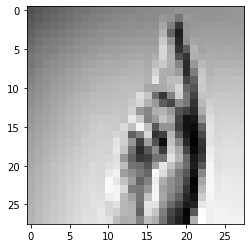

In [55]:
plt.imshow(np.array(mask_17.iloc[1, 1:]).reshape(28,28), cmap = 'gray');

## Interpreting the Coefficients

In [56]:
classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '10', '11','12','13','14','15','16','17', '18','19','20','21','22','23', '24']
nclasses = len(classes)

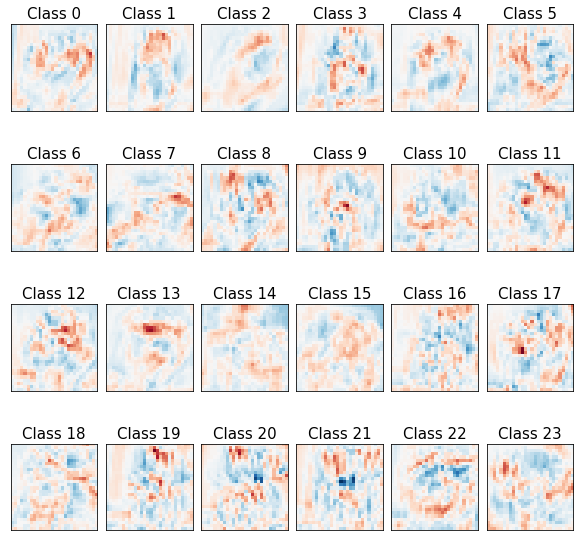

In [57]:
scale = np.max(np.abs(lr.coef_))
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

#for a in range(nclasses):
for i,ax, in enumerate(axes.flat):
    ax.imshow(lr.coef_[i].reshape(28, 28), cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    title = 'Class %i' % i
    ax.set_title(title, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

with positive coefficients in blue and negative coefficients in red